<a href="https://colab.research.google.com/github/LokeCoder11/KnowledgeReference/blob/main/Copy_of_Data_Visualisation_In_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Topics
1. Matplotlib
2. Seaborn
3. Choosing the right chart
4. Important Functions | Advanced Charting
5. Chart Templates



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir('/content/drive/MyDrive/M2_Project')

In [ ]:
# Drive link for all datasets - https://drive.google.com/drive/folders/1vLMCY81mZ2l_zNRsiK2Trs1DtumITSla

In [ ]:
# load the data
orders = pd.read_excel('/content/drive/MyDrive/M2_Project/Superstore.xlsx',sheet_name ='Orders')

In [ ]:
# orders.head(2), orders.tail(2)

In [ ]:
orders.shape

(9994, 21)

### Matplotlib

In [ ]:
import matplotlib.pyplot as plt

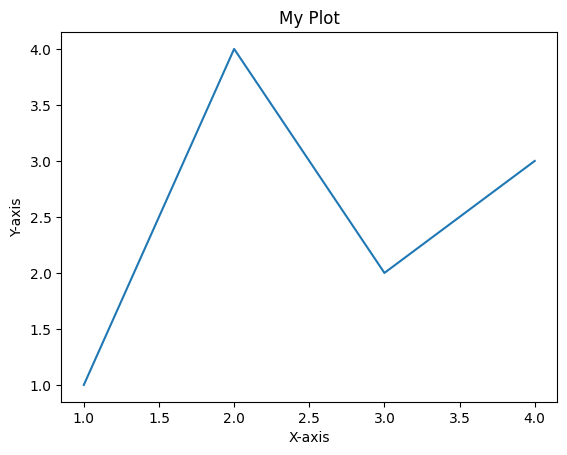

In [ ]:
# Line plot
x = [1, 2, 3, 4]
y = [1, 4, 2, 3]

plt.plot(x, y) # line plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('My Plot')
plt.show()

### Seaborn

In [ ]:
import seaborn as sns

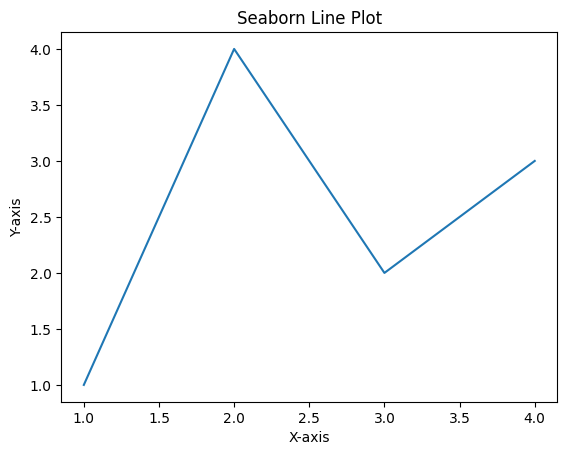

In [ ]:
# Line plot
x = [1, 2, 3, 4]
y = [1, 4, 2, 3]
sns.lineplot(x = x, y= y)
plt.title('Seaborn Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

### Choosing the right chart

In [ ]:
orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

#### Important Charts

In [ ]:
# Continuous Variable -- Histogram, KDE plot, Box plot  | Ex - Quantity, Sales, Profit
# Categorical Variable -- Bar Plot, Pie Chart  |  Ex - Category, State
# Continuous - Continuous Variable -- Line Plot, Scatter plot, Correlation Plot | Ex - Order Date vs Sales
# Categorical - Categorical Variable -- heatmap | Ex - State vs city
# Continuous - Categorical variable -- Box Plot, Bar Plot | Ex - State vs Sales
# Misc - Pair Plot

#### Continuous Variable

In [ ]:
orders.Quantity.max() , orders.Quantity.min()

(14, 1)

In [ ]:
orders.Quantity.unique()

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12])

In [ ]:
orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year'],
      dtype='object')

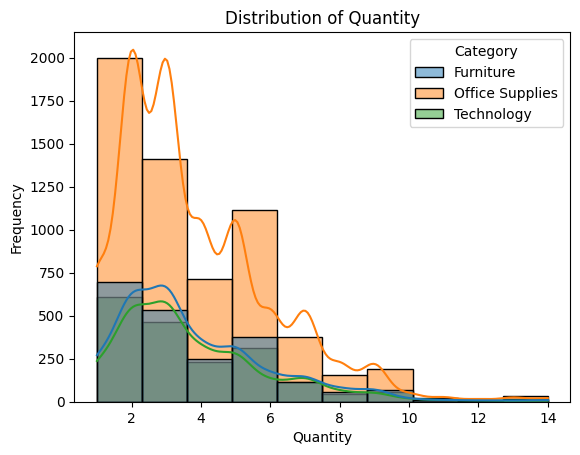

In [ ]:
sns.histplot(data=orders, x="Quantity", bins=10, kde = True, color  = 'Red')


plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")

plt.show()

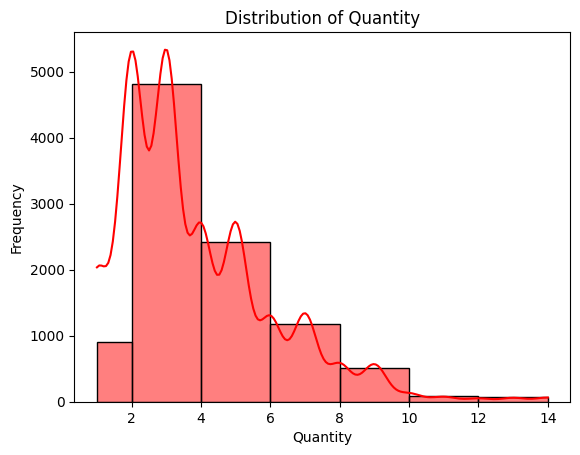

In [ ]:
custom_bin = [1,2,4,6,8,10,12,14]
sns.histplot(data=orders, x="Quantity", bins=custom_bin, kde = True, color  = 'Red')


plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")

plt.show()

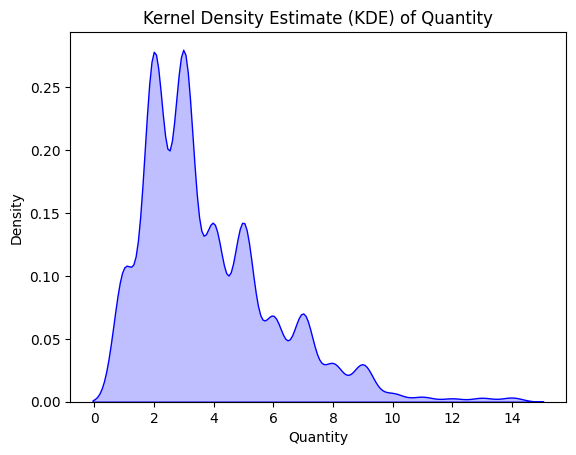

In [ ]:
# Create KDE plot
sns.kdeplot(data=orders['Quantity'],fill =True, color = 'blue')
plt.title('Kernel Density Estimate (KDE) of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Density')

plt.show()

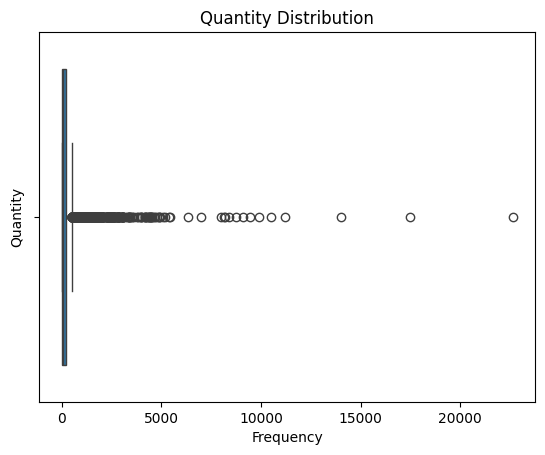

In [ ]:
# Box plot
# Create box plot
sns.boxplot(x="Sales", data=orders)
plt.title("Quantity Distribution")
plt.xlabel("Frequency")
plt.ylabel("Quantity")
plt.show()


In [ ]:
# Outlier

#### Outlier Detection

In [ ]:
orders.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [ ]:
# Outlier Detection using standard deviation
# Approximately 68% of the data falls within one standard deviation of the mean.
# Approximately 95% falls within two standard deviations.
# Approximately 99.7% falls within three standard deviations.
mean = orders.Sales.mean()
std = orders.Sales.std()
outlier_pos = mean + 6*std # 4 to 6 sigma
outlier_neg = mean - 6*std # 4 to 6 sigma
print(outlier_pos,outlier_neg)

3969.328603882583 -3509.6126022215863


In [ ]:
orders.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [ ]:
orders.loc[(orders.Sales>=outlier_neg) & (orders.Sales<=outlier_pos),].shape[0]/orders.shape[0]

0.9957974784870922

In [ ]:
orders.loc[~((orders.Sales>=outlier_neg) & (orders.Sales<=outlier_pos)),].shape

(42, 21)

In [ ]:
# orders.loc[~((orders.Sales > outlier_pos) | ((orders.Sales < outlier_neg)))]

In [ ]:
(orders.loc[(orders.Sales > outlier_pos) | ((orders.Sales < outlier_neg)),'Sales'].shape[0]/orders.shape[0])*100

0.5403241945167101

#### Categorical Variable

In [ ]:
orders.State.unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [ ]:
orders.groupby('Category')['Order ID'].count().reset_index()['Category']

0          Furniture
1    Office Supplies
2         Technology
Name: Category, dtype: object

In [ ]:
orders.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

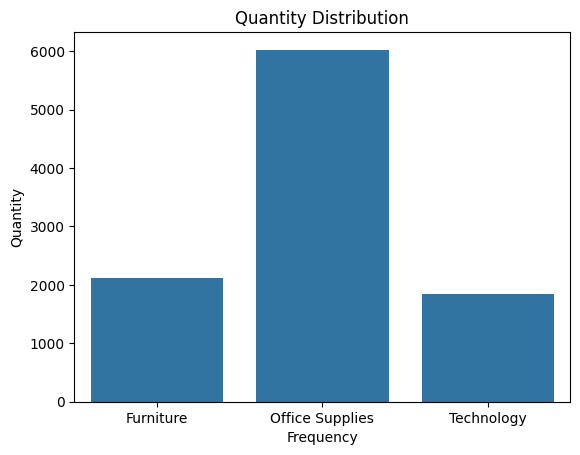

In [ ]:
# Bar Plot
x = list(orders.groupby('Category')['Order ID'].count().reset_index()['Category'])
y = list(orders.groupby('Category')['Order ID'].count().reset_index()['Order ID'])
sns.barplot(x= x, y=y)
plt.title("Quantity Distribution")
plt.xlabel("Frequency")
plt.ylabel("Quantity")
plt.show()

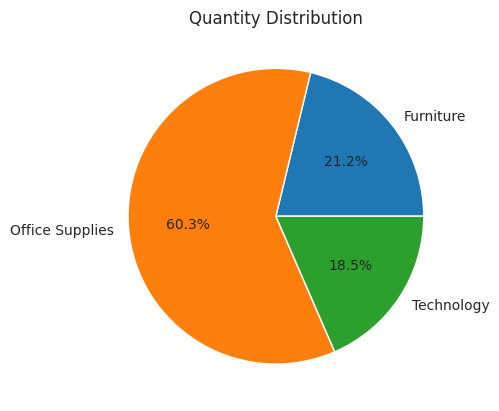

In [ ]:
# Pie Chart (No Function in Seaborn)
x = list(orders.groupby('Category')['Order ID'].count().reset_index()['Category'])
y = list(orders.groupby('Category')['Order ID'].count().reset_index()['Order ID'])
plt.pie(y, labels=x, autopct='%1.1f%%')
plt.title("Quantity Distribution")
# plt.xlabel("Frequency")
# plt.ylabel("Quantity")
plt.show()

#### Continuous - Continuous Variable

In [ ]:
# Line Plot, Scatter plot, Correlation Plot

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

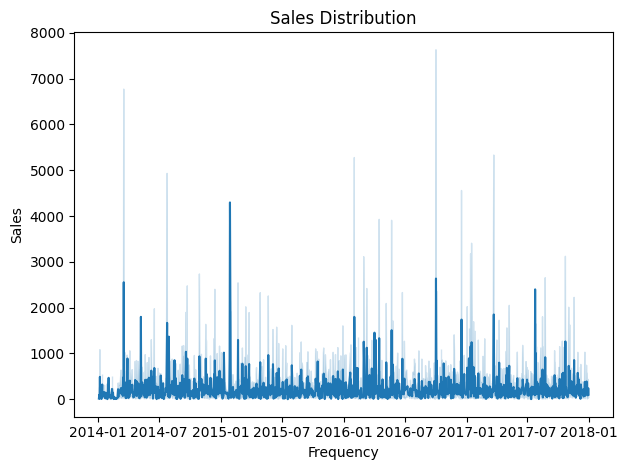

In [ ]:
# Line Plot
sns.lineplot(x='Order Date', y='Sales', data = orders)
plt.title("Sales Distribution")
plt.xlabel("Frequency")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
orders['Order Date']

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [ ]:
pd.to_datetime(orders['Order Date'].dt.year.astype('str') + '-' + orders['Order Date'].dt.month.astype('str') + '-01')

0      2016-11-01
1      2016-11-01
2      2016-06-01
3      2015-10-01
4      2015-10-01
          ...    
9989   2014-01-01
9990   2017-02-01
9991   2017-02-01
9992   2017-02-01
9993   2017-05-01
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [ ]:
# Smoothening
orders['OrderDateMonth'] = pd.to_datetime(orders['Order Date'].dt.year.astype('str') + '-' + orders['Order Date'].dt.month.astype('str') + '-01')

In [ ]:
# orders.head(5)

In [ ]:
# orders.groupby('OrderDateMonth')['Sales'].mean().reset_index()

,OrderDateMonth,Sales
0,2014-01-01,180.213861
1,2014-02-01,98.258522
2,2014-03-01,354.719803
3,2014-04-01,209.595148
4,2014-05-01,193.838418
5,2014-06-01,256.260204
6,2014-07-01,237.387364
7,2014-08-01,182.414827
8,2014-09-01,305.139369
9,2014-10-01,197.820082


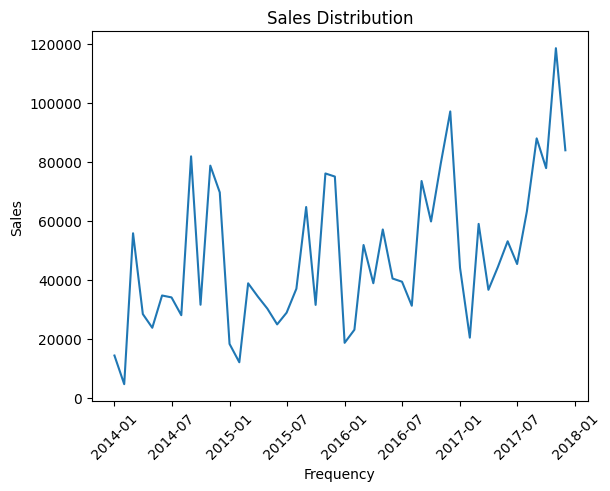

In [ ]:
sns.lineplot(x='OrderDateMonth', y='Sales', data = orders.groupby('OrderDateMonth')['Sales'].sum().reset_index() )
plt.title("Sales Distribution")
plt.xlabel("Frequency")
plt.ylabel("Sales")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
orders['year'] = orders['Order Date'].dt.year.astype('str')

In [ ]:
orders.groupby('year')['Sales'].sum().reset_index()

,year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


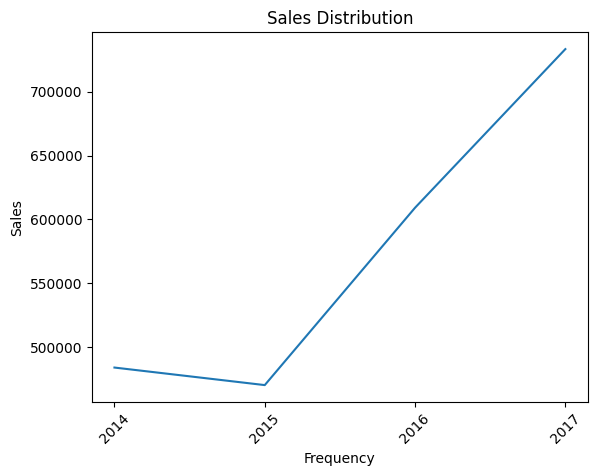

In [ ]:
sns.lineplot(x='year', y='Sales', data = orders.groupby('year')['Sales'].sum().reset_index() )
plt.title("Sales Distribution")
plt.xlabel("Frequency")
plt.ylabel("Sales")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
orders.groupby(['OrderDateMonth','Category'])['Sales'].sum().reset_index()

,OrderDateMonth,Category,Sales
0,2014-01-01,Furniture,6242.5250
1,2014-01-01,Office Supplies,4851.0800
2,2014-01-01,Technology,3143.2900
3,2014-02-01,Furniture,1839.6580
4,2014-02-01,Office Supplies,1071.7240
...,...,...,...
139,2017-11-01,Office Supplies,31472.3370
140,2017-11-01,Technology,49918.7730
141,2017-12-01,Furniture,31407.4668
142,2017-12-01,Office Supplies,30436.9420


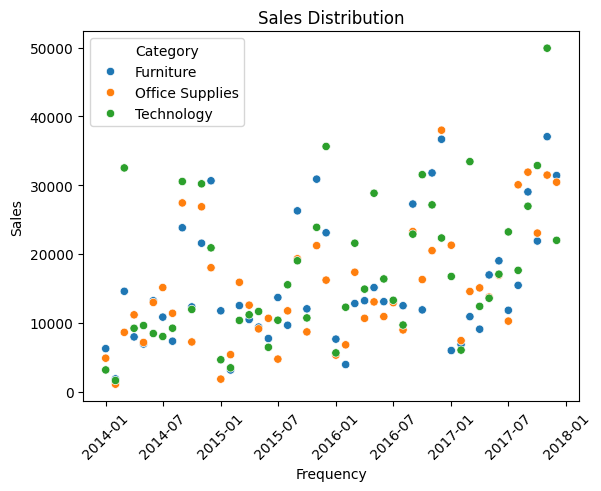

In [ ]:
# Scatter plot
sns.scatterplot(x='OrderDateMonth', y='Sales', data = orders.groupby(['OrderDateMonth','Category'])['Sales'].sum().reset_index(),hue= 'Category' )
plt.title("Sales Distribution")
plt.xlabel("Frequency")
plt.ylabel("Sales")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
orders.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,OrderDateMonth,OrderDateMon,OrderDateYear
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016-11-01,11,2016


In [ ]:
orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
# Correlation Plot : Continuous Variable
orders_corr = orders.loc[ : , ['Sales','Discount','Profit']].corr()

In [ ]:
orders_corr

,Sales,Discount,Profit
Sales,1.000000,-0.028190,0.479064
Discount,-0.028190,1.000000,-0.219487
Profit,0.479064,-0.219487,1.000000


from matplotlib import pyplot as plt
_df_0['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Discount'].plot(kind='hist', bins=20, title='Discount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Profit'].plot(kind='hist', bins=20, title='Profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Sales', y='Discount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Discount', y='Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Discount'].plot(kind='line', figsize=(8, 4), title='Discount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Profit'].plot(kind='line', figsize=(8, 4), title='Profit')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Sales', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Discount', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Profit', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

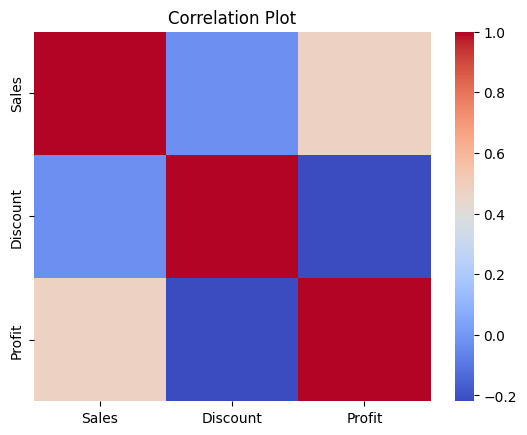

In [ ]:
sns.heatmap(orders_corr, cmap='coolwarm')

# Set title and labels
plt.title("Correlation Plot")
# plt.xlabel("Features")
# plt.ylabel("Features")

# Show plot
plt.show()

#### Categorical - Categorical Variable

In [ ]:
# heatmap

In [ ]:
orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'OrderDateMonth', 'OrderDateMon', 'OrderDateYear'],
      dtype='object')

In [ ]:
# pd.crosstab(orders.Category,orders.State)

State,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Category,,,,,,,,,,,,,,,,,,,,,
Furniture,11,49,9,444,51,13,18,3,85,32,...,2,45,202,7,2,52,114,1,32,1
Office Supplies,36,127,36,1198,96,58,58,6,229,115,...,8,118,604,39,6,136,292,3,53,0
Technology,14,48,15,359,35,11,20,1,69,37,...,2,20,179,7,3,36,100,0,25,0


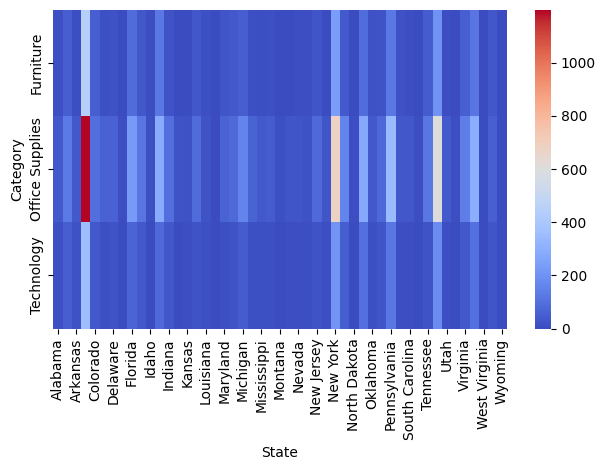

In [ ]:
# plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(orders.Category,orders.State), cmap="coolwarm")
plt.tight_layout()
plt.show()

#### Continuous - Categorical variable

In [ ]:
# Box Plot, Bar Plot

In [ ]:
orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'OrderDateMonth', 'OrderDateMon', 'OrderDateYear'],
      dtype='object')

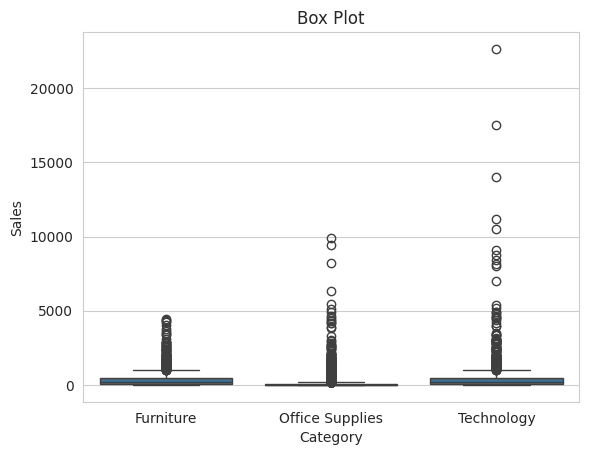

In [ ]:
# Box Plot
sns.boxplot(x='Category', y='Sales', data=orders)

# Set title and labels
plt.title('Box Plot')
plt.xlabel('Category')
plt.ylabel('Sales')

# Show plot
plt.show()

In [ ]:
orders['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

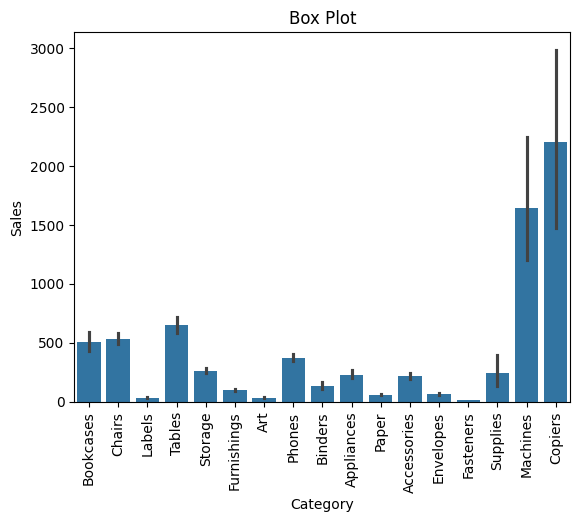

In [ ]:
# Bar Plot
sns.barplot(x='Sub-Category', y='Sales', data=orders, estimator = 'mean')

# Set title and labels
plt.title('Box Plot')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation = 90)

# Show plot
plt.show()

#### Misc

In [ ]:
orders['Postal Code'] = orders['Postal Code'].astype('str')

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   object        
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

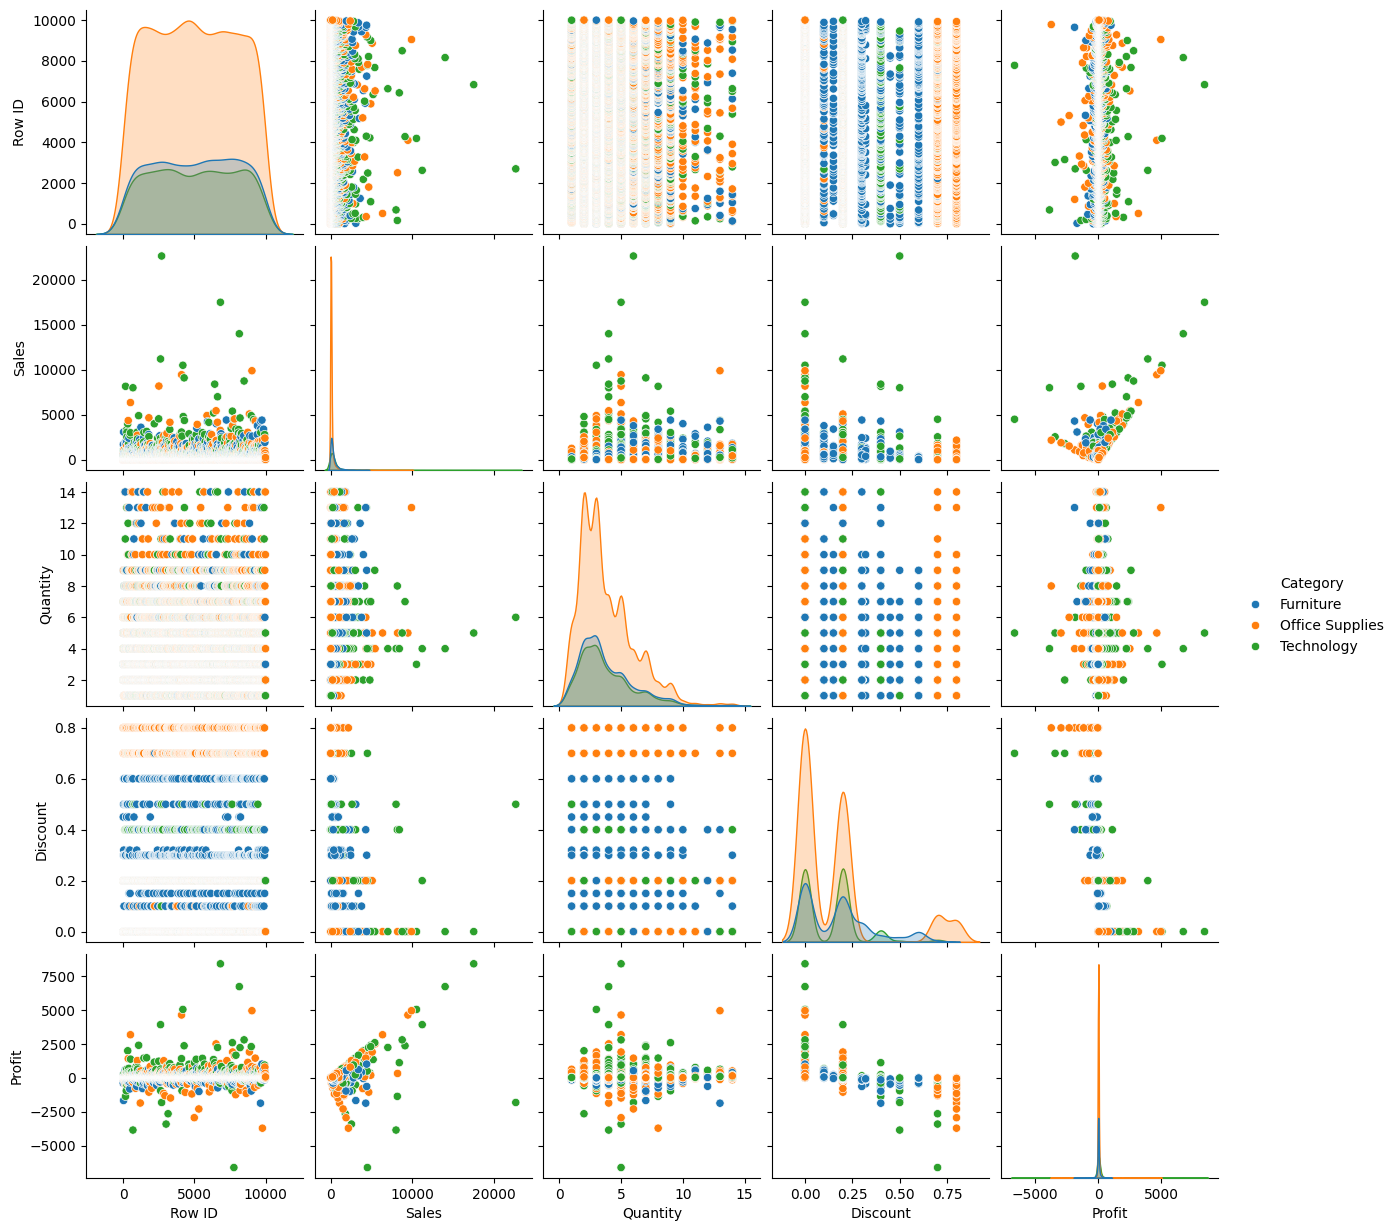

In [ ]:
# Pair Plot
# Create pair plot # Continuous Variable
sns.pairplot(orders, hue = 'Category')

# Show plot
plt.show()

### Important Functions || Advanced Charting


In [ ]:
# plt.title(): Adds a title to the chart to provide context and explain the purpose of the visualization.
# plt.xlabel() and plt.ylabel(): Adds labels to the x-axis and y-axis, respectively, to describe the variables being plotted.
# plt.axvline() and plt.axhline(): Adds vertical or horizontal lines at specific positions on the chart, useful for highlighting important values or thresholds.
# plt.legend(): Displays a legend to identify different elements of the chart, such as different categories or data series.
# plt.grid(): Adds grid lines to the chart, which can help in better understanding the data and its distribution.
# plt.xlim() and plt.ylim(): Sets the limits for the x-axis and y-axis, respectively, to focus on a specific range of values.
# plt.xticks() and plt.yticks(): Customizes the tick marks and labels on the x-axis and y-axis, allowing for better readability.
# plt.subplots():
# plt.tight_layout(): Adjusts the layout of the chart to improve spacing and prevent overlapping elements.
# plt.annotate(): Allows adding text annotations at specific points on the chart, such as statistical summaries or important observations.
# plt.text(): Add text on the chart



In [ ]:
# Load the Iris dataset
iris = sns.load_dataset('iris')


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


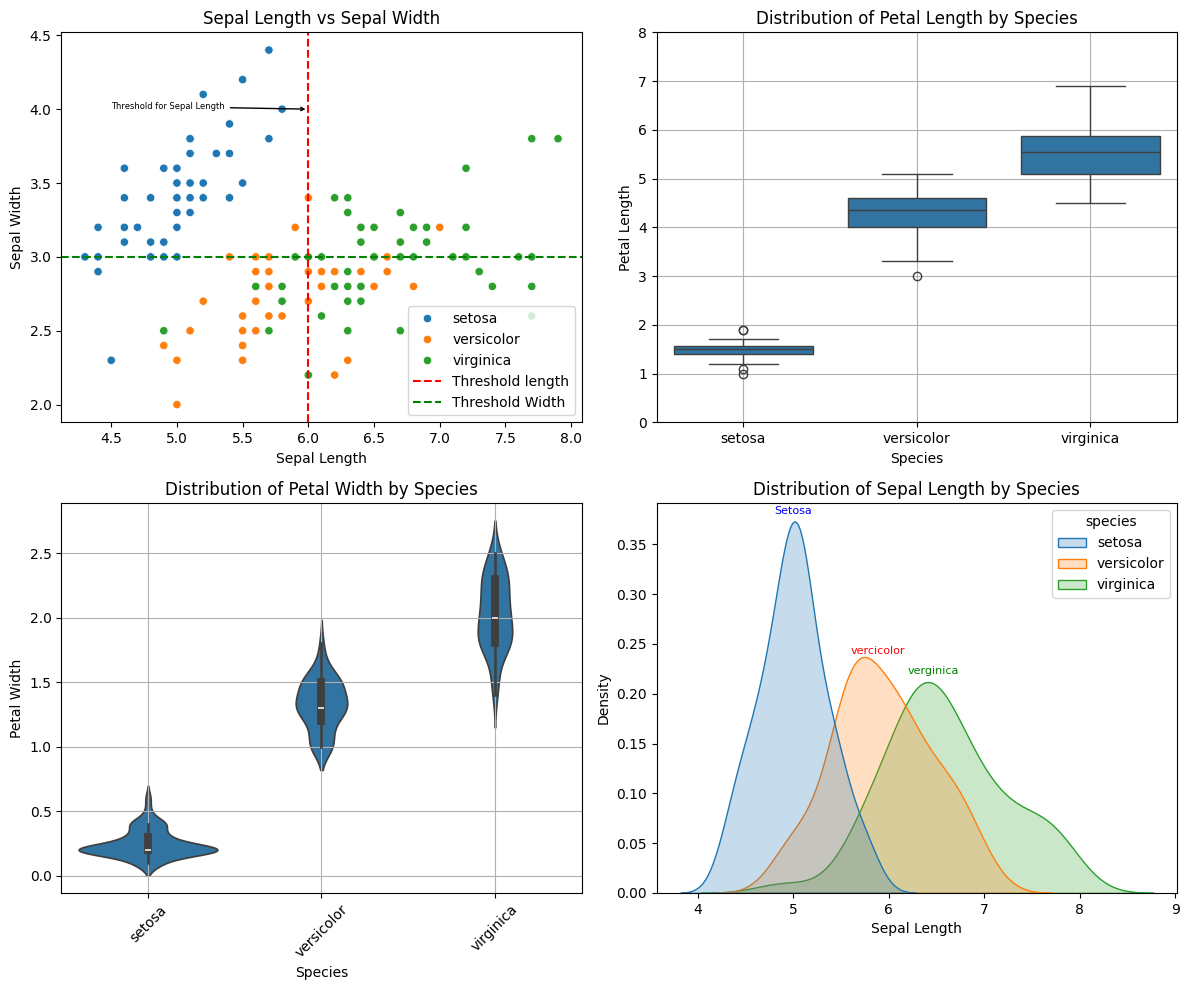

In [ ]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1 - Scatter plot
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', ax=axes[0, 0], hue = 'species')
axes[0, 0].set_title('Sepal Length vs Sepal Width')
axes[0, 0].set_xlabel('Sepal Length')
axes[0, 0].set_ylabel('Sepal Width')


# Add vertical and horizontal lines
axes[0, 0].axvline(x=6, color='red', linestyle='--', label = 'Threshold length')
axes[0, 0].axhline(y=3, color='green', linestyle='--',label = 'Threshold Width')

# Add annotation
axes[0, 0].annotate('Threshold for Sepal Length', xy=(6, 4), xytext=(4.5, 4),
                    arrowprops=dict(facecolor='black', arrowstyle='->'),
                    fontsize=6)
axes[0, 0].legend()

# Plot 2 - Box plot
sns.boxplot(data=iris, x='species', y='petal_length', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Petal Length by Species')
axes[0, 1].set_xlabel('Species')
axes[0, 1].set_ylabel('Petal Length')

# Add grid
axes[0, 1].grid(True)

# Set y-axis limit
axes[0, 1].set_ylim(0, 8)

# Plot 3 - Violin plot
sns.violinplot(data=iris, x='species', y='petal_width', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Petal Width by Species')
axes[1, 0].set_xlabel('Species')
axes[1, 0].set_ylabel('Petal Width')

# Add grid and xticks
axes[1, 0].grid(True)
axes[1, 0].set_xticks(range(len(iris['species'].unique())))
axes[1, 0].set_xticklabels(iris['species'].unique(), rotation=45)

# Plot 4 - KDE plot
sns.kdeplot(data=iris, x='sepal_length', hue='species', fill=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Sepal Length by Species')
axes[1, 1].set_xlabel('Sepal Length')
axes[1, 1].set_ylabel('Density')

# Add text on the chart
# axes[1, 1].text(7, 0.25, 'Sepal Length Distribution', fontsize=12, color='blue')
axes[1, 1].text(4.8, 0.38, 'Setosa', fontsize=8, color='blue')
axes[1, 1].text(5.6, 0.24, 'vercicolor', fontsize=8, color='red')
axes[1, 1].text(6.2, 0.22, 'verginica', fontsize=8, color='green')

# Adjust layout
plt.tight_layout() # Automatically Adjust

# Show plot
plt.show()

### How to form storyline and read charts?

In [ ]:
# Establish the Status Quo

In [ ]:
# Analyze Data Points

# 1. Look at individual data points or bars on the chart.
# 2. Identify any outliers or unusual patterns.

# Analyze Trends and Patterns:

# 1. Look for trends over time (for time-series data) or patterns in the data.
# 2. Identify any significant increases, decreases, or fluctuations.
# 3. Consider the direction and magnitude of changes.


In [ ]:
# Define the Hypothesis to establish the relation with status quo

In [ ]:
# Compare Data and Relationships:

# 1. If the chart compares multiple columns, analyze the differences and similarities between them.
# 2. Look for any correlations or relationships between variables (e.g., positive, negative, no correlation).
# 3. Consider the implications of these relationships on the data being presented.

In [ ]:
# Conclusion
# Actionables

### Chart Templates

In [ ]:
dataset = pd.read_csv('Telecom Churn.csv')

In [ ]:
dataset.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
dataset.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Histogram & BoxPlot for all continuous Variable

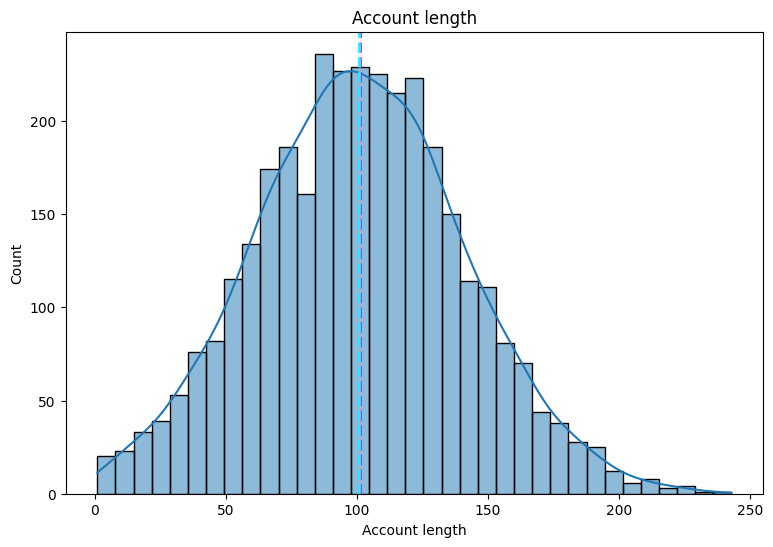

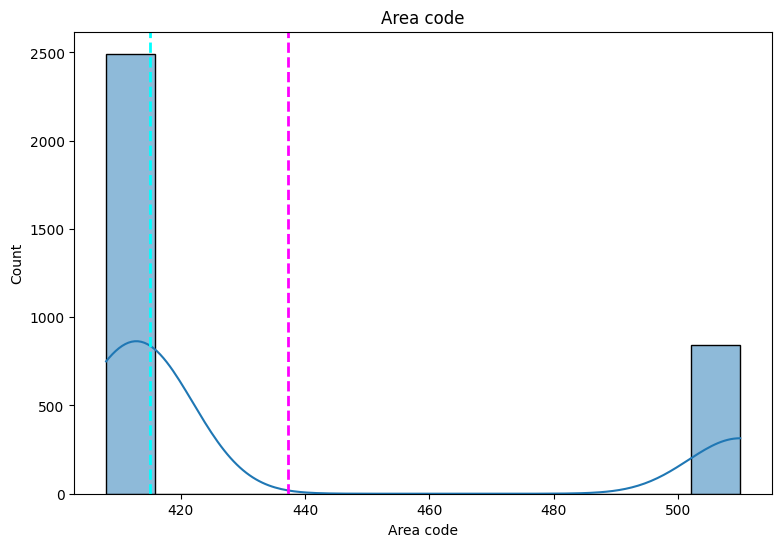

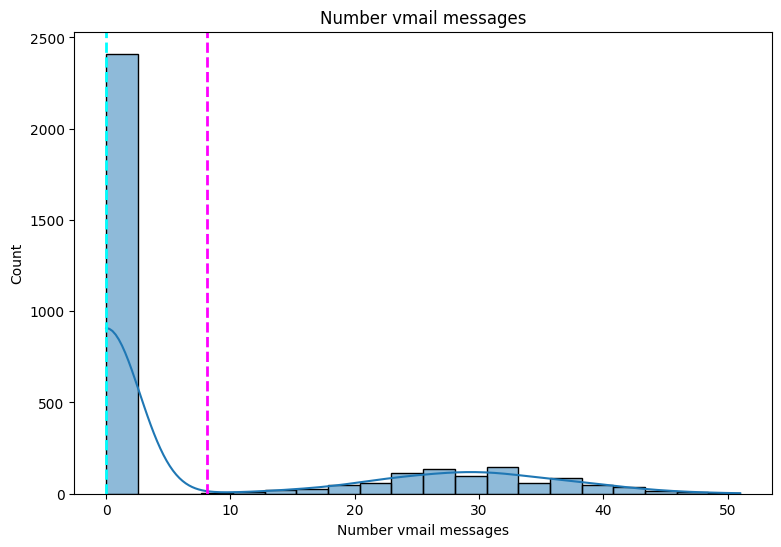

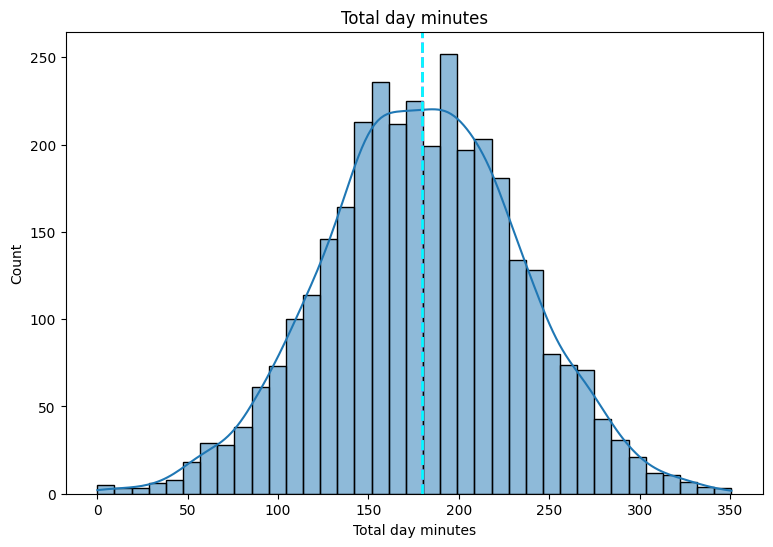

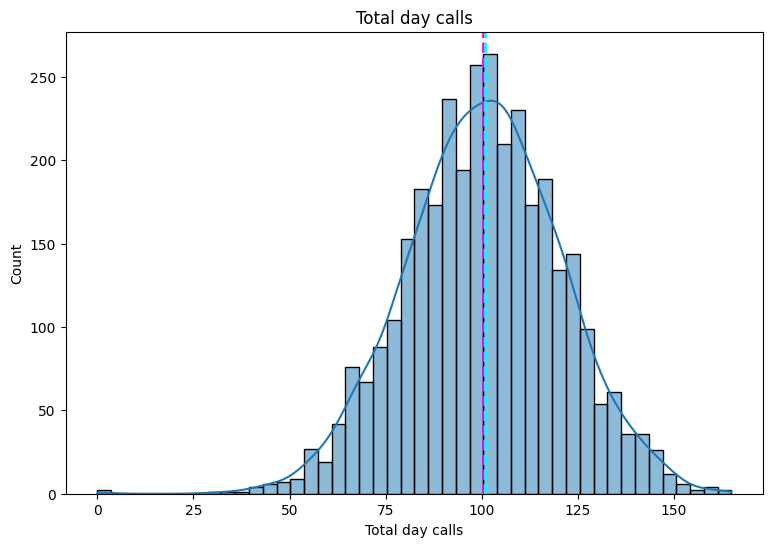

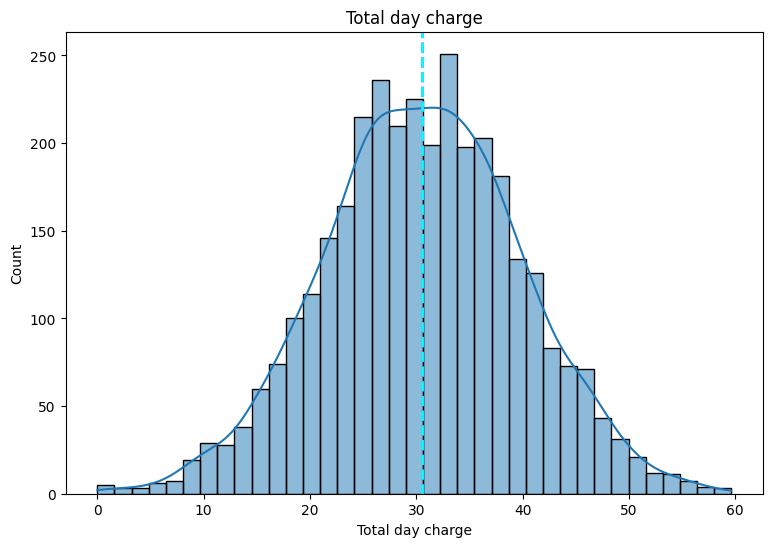

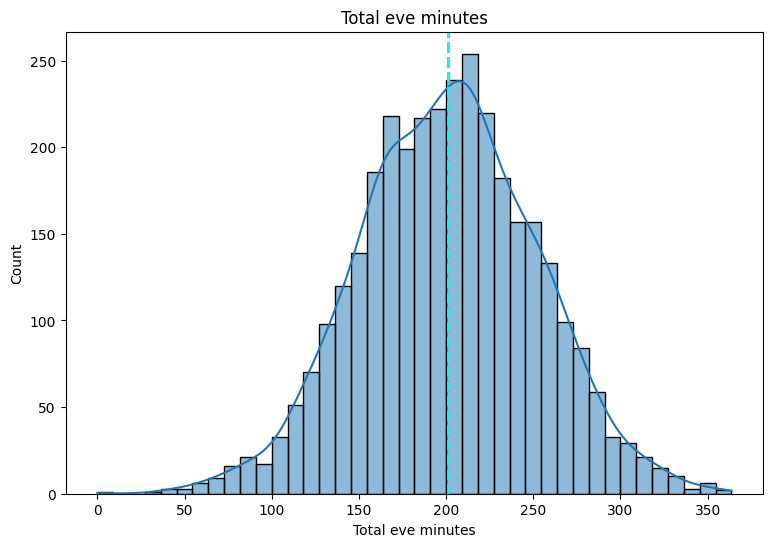

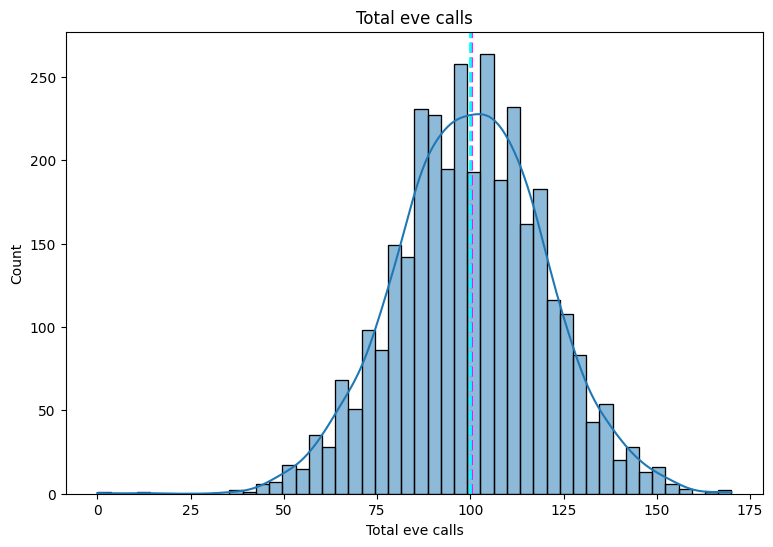

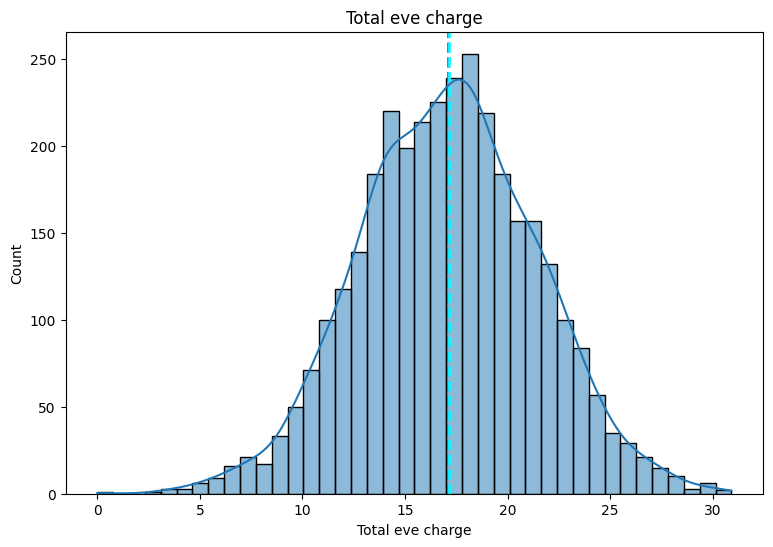

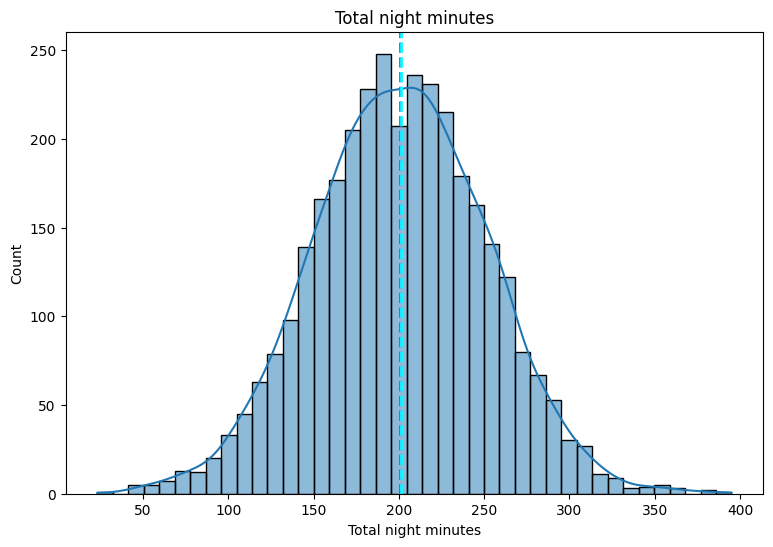

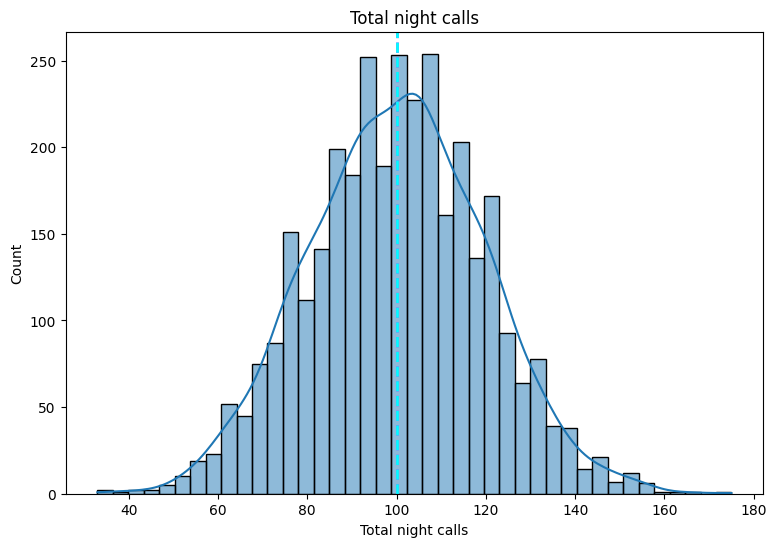

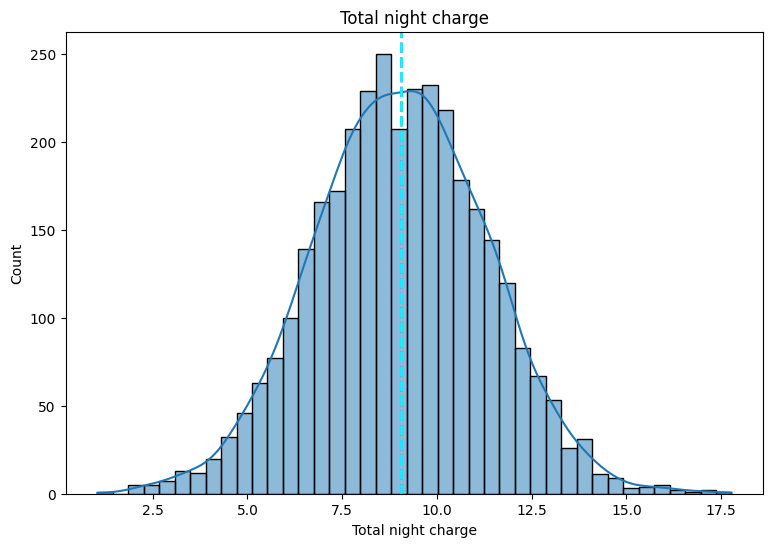

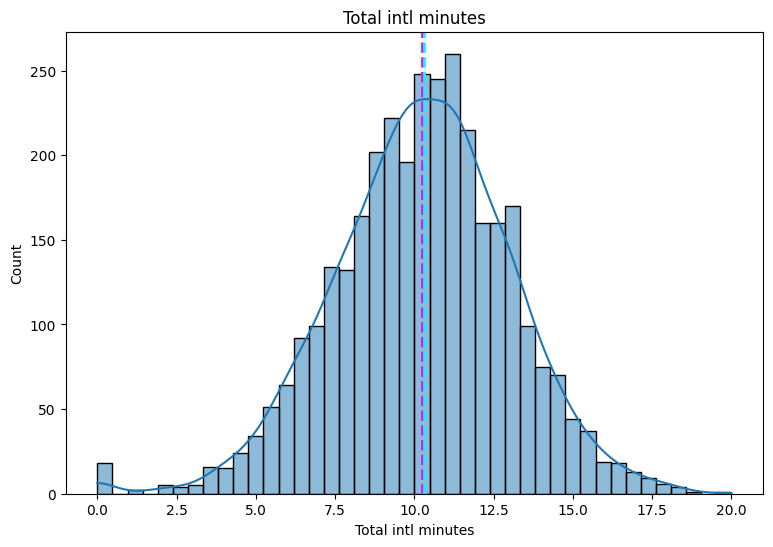

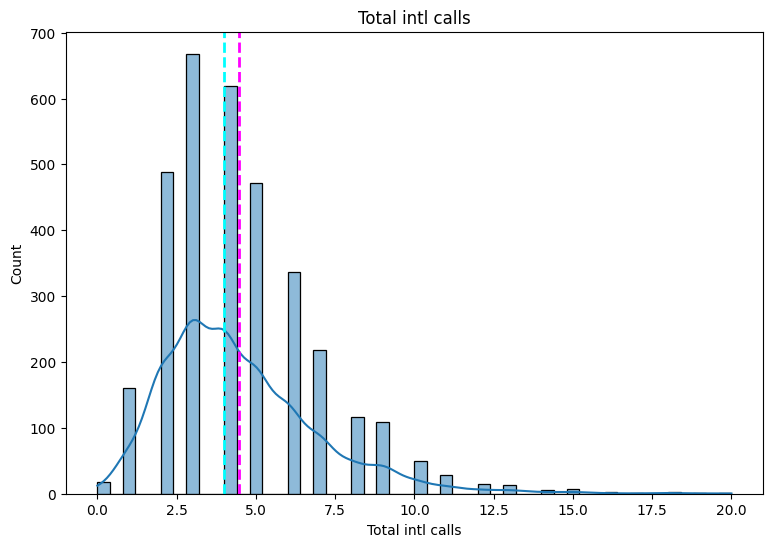

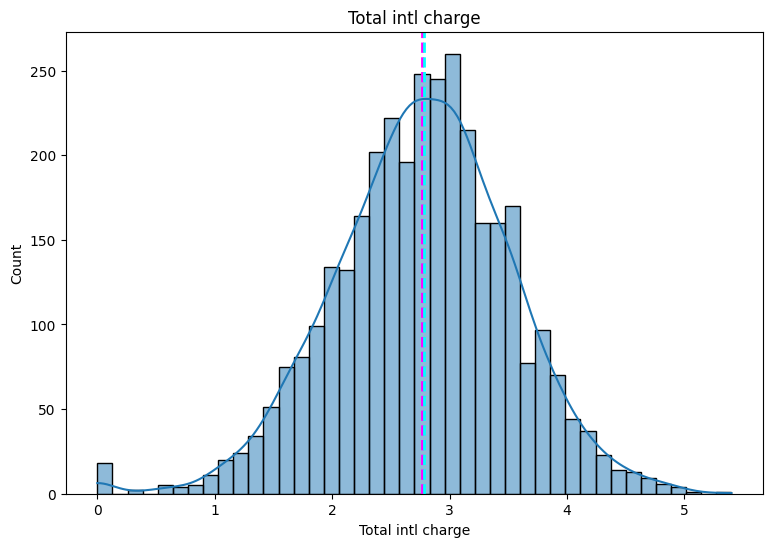

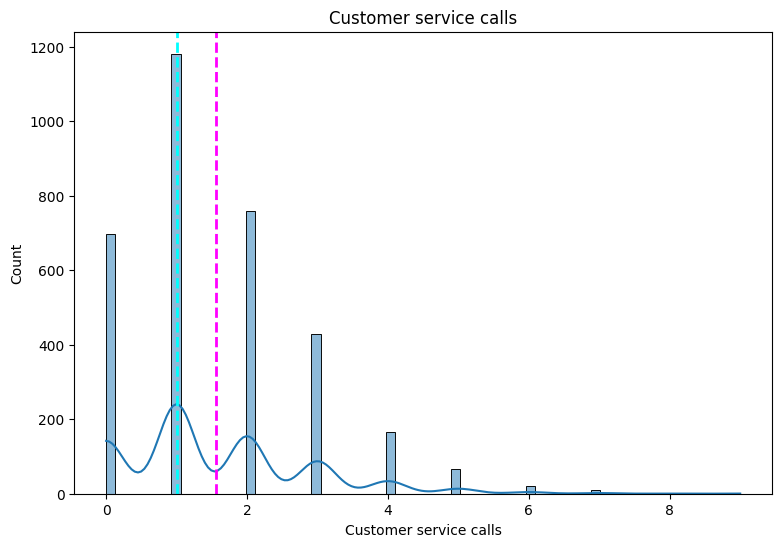

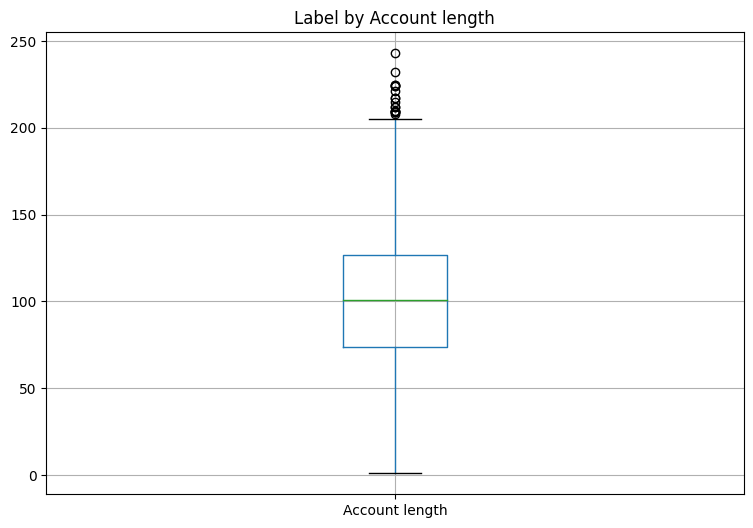

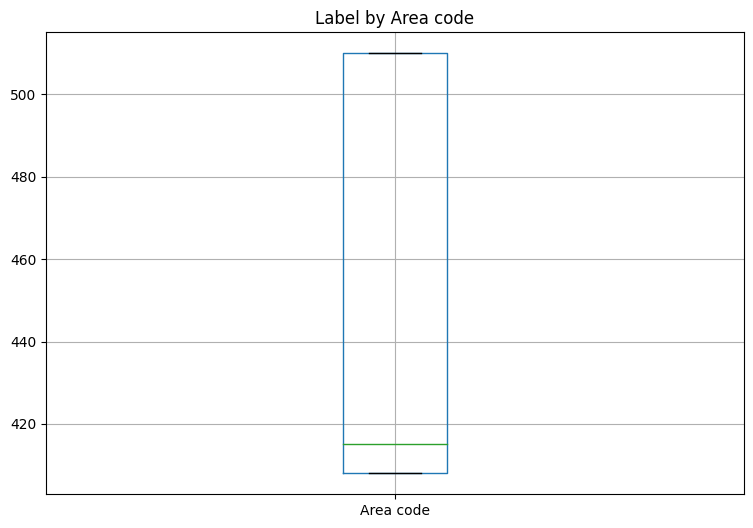

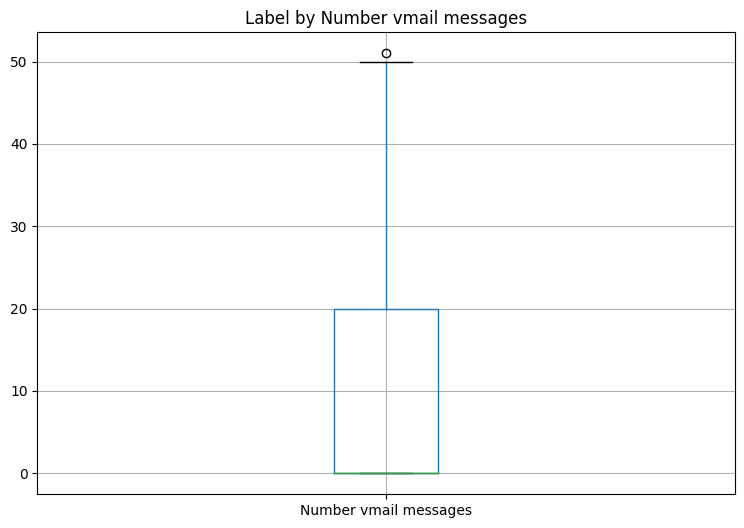

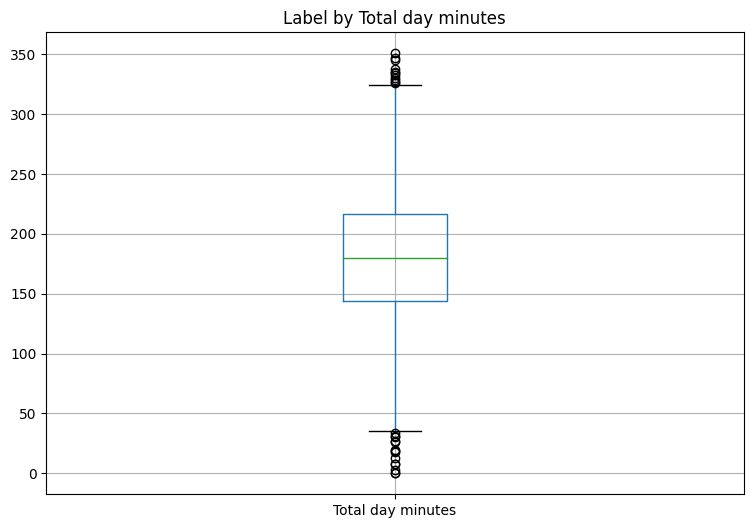

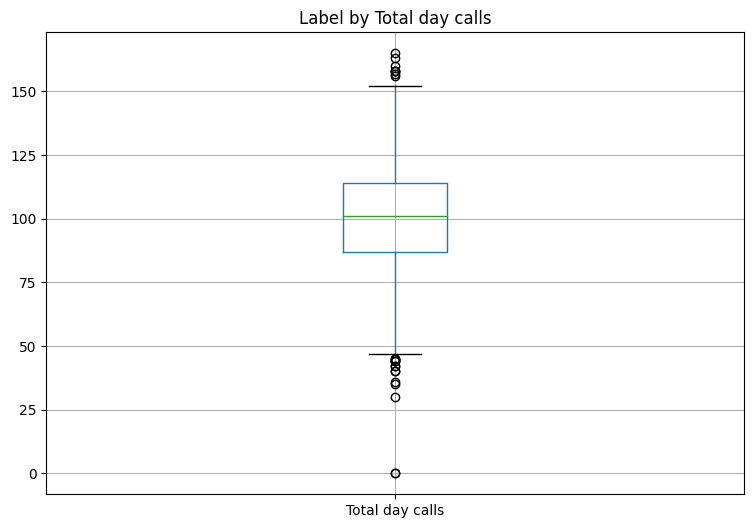

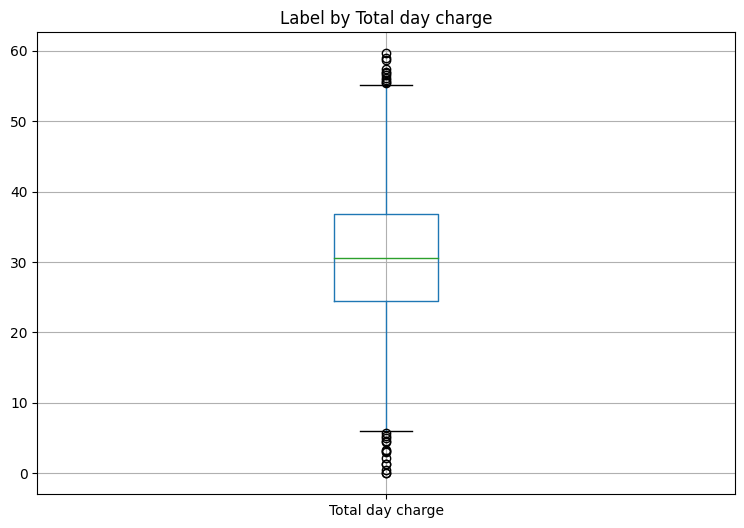

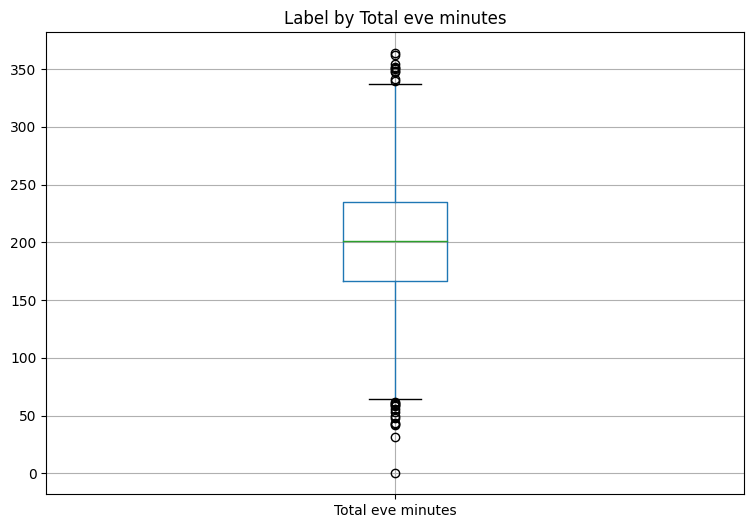

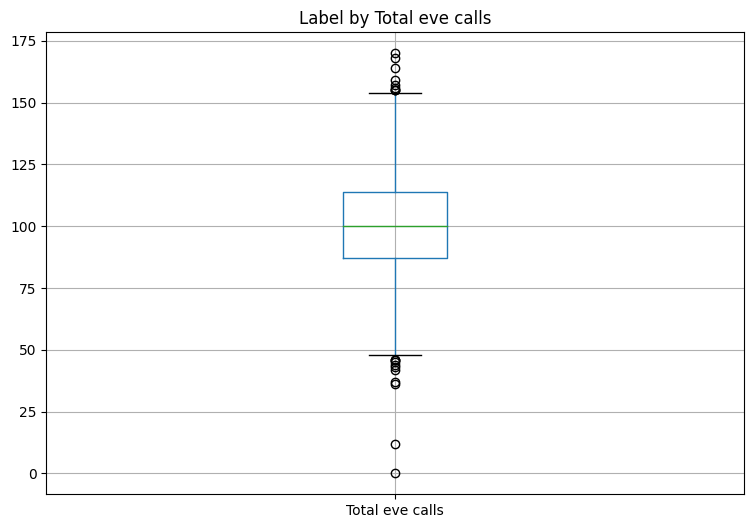

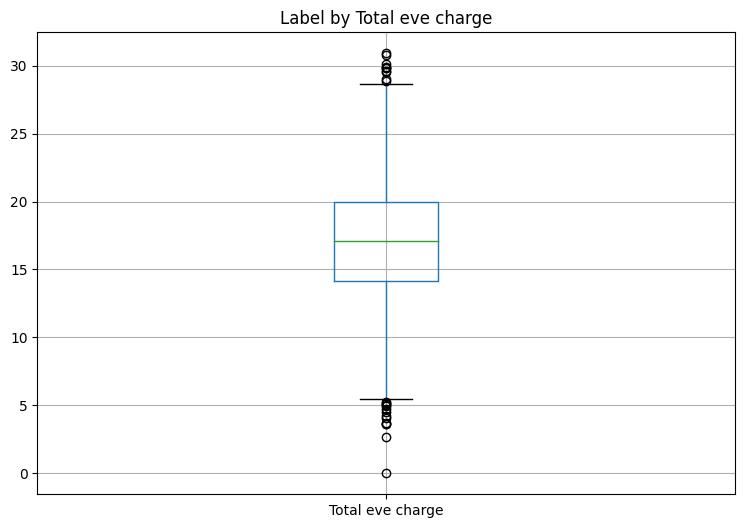

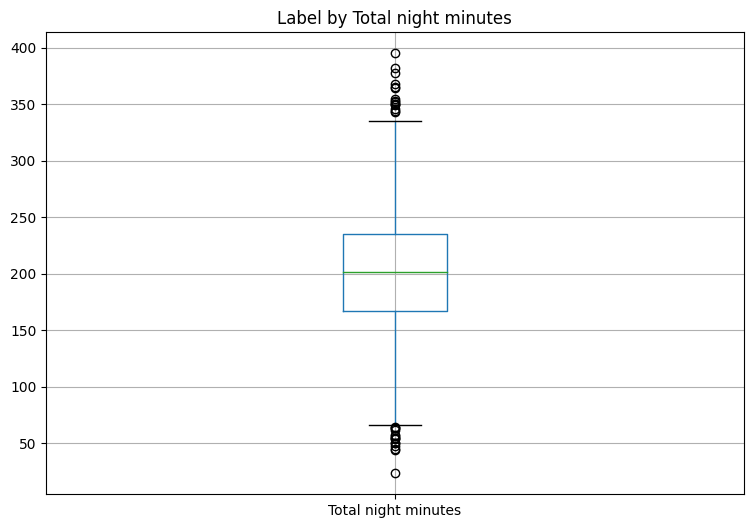

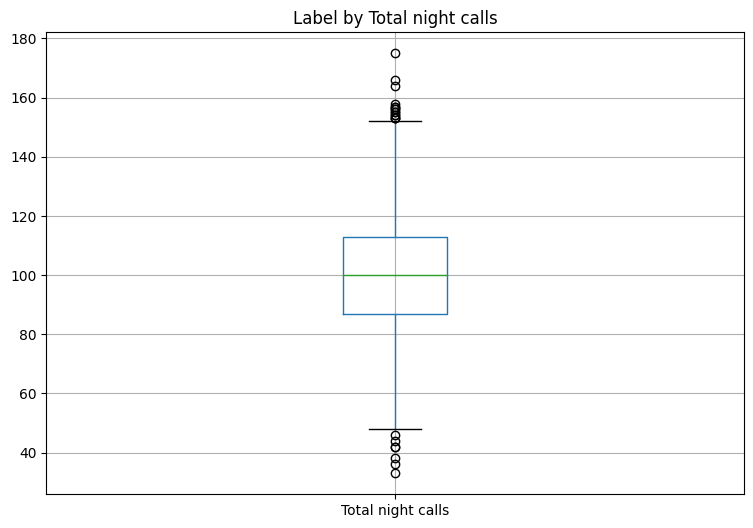

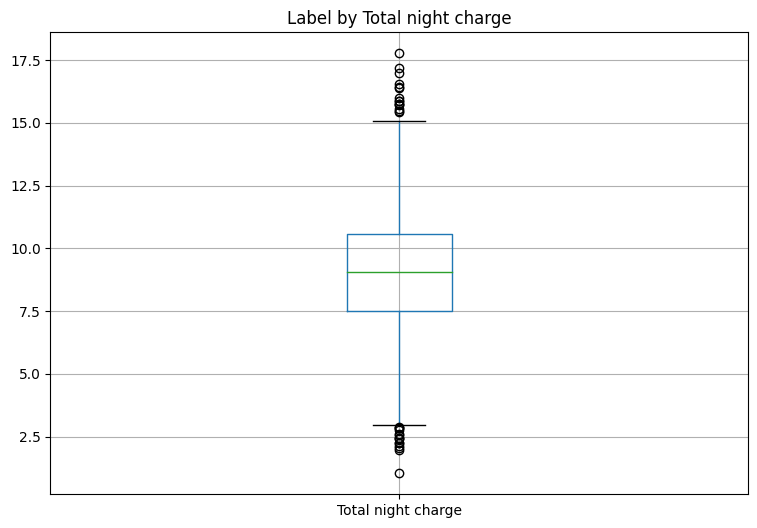

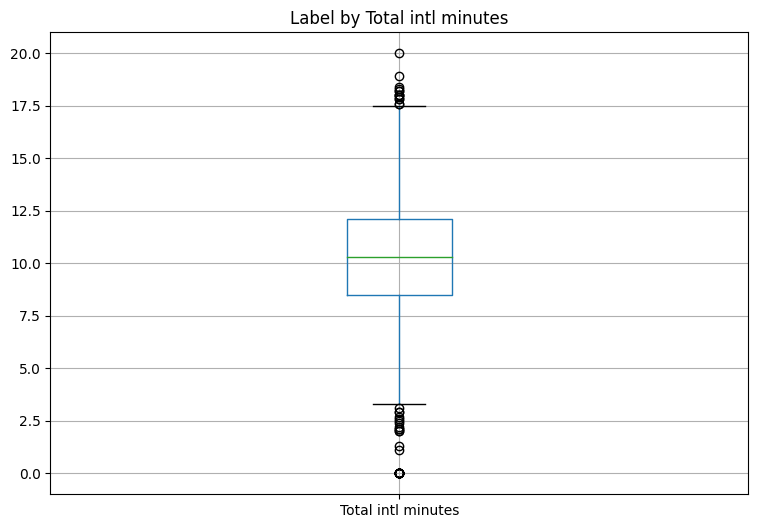

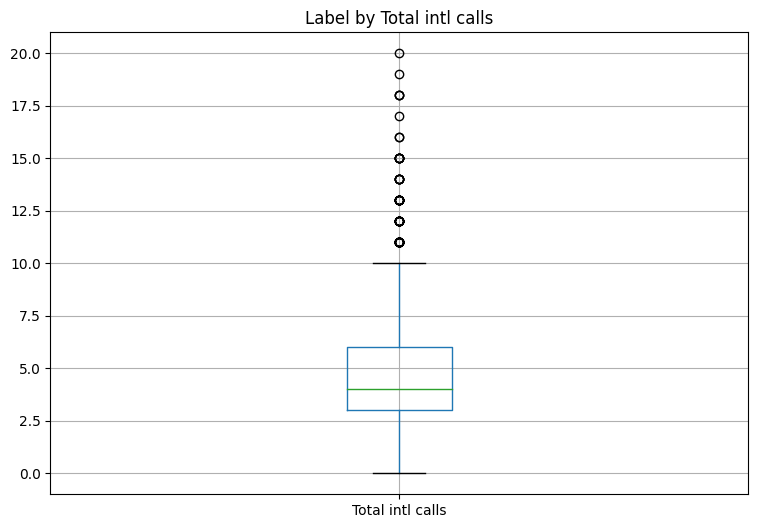

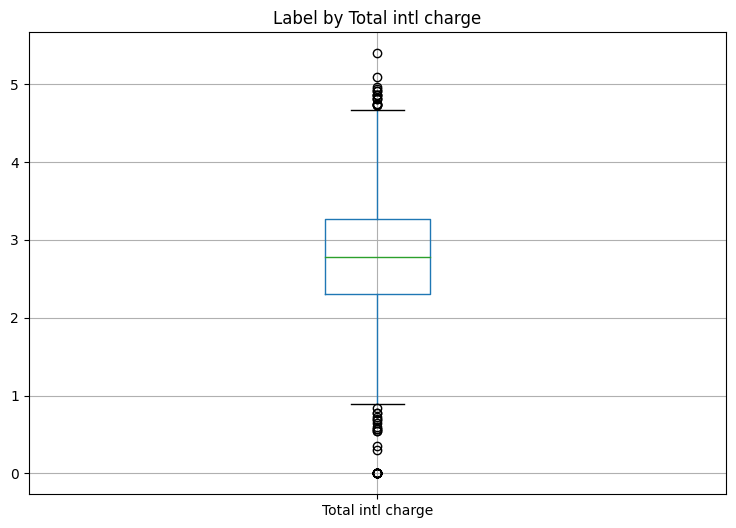

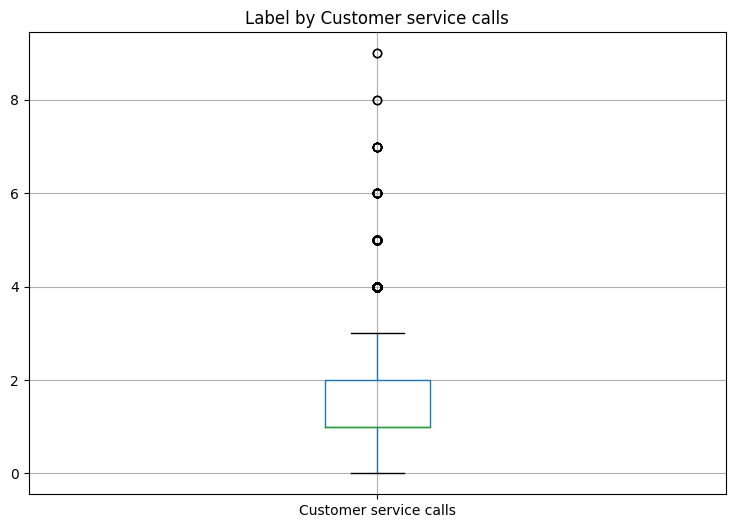

In [ ]:
for col in dataset.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset[col])
  sns.histplot(dataset[col],kde =True) # bin can be mentioned, if required
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

# Visualizing code of box plot for each columns to know the data distibution
for col in dataset.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot( col, ax = ax)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()


#### Pie Plot

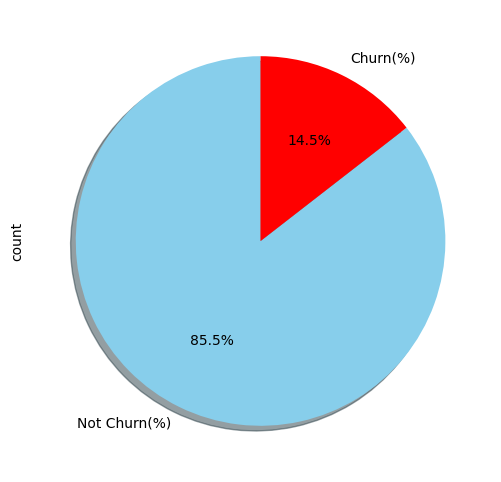

In [ ]:
# Categorical Variable name
dataset['Churn'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Churn(%)','Churn(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )
plt.show()

#### Bar graph

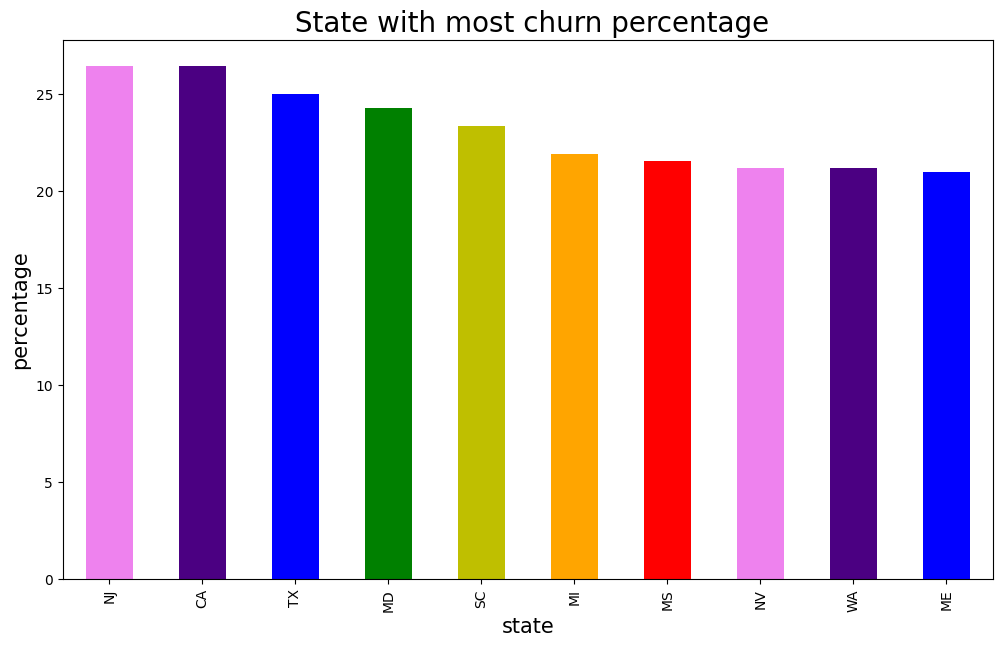

In [ ]:
# Showing Average True Churn Percentage state wise
# State vs. average true churn percantage visualization code
# Vizualizing top 10 churned state
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((dataset.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

#### Scatter Plot

In [ ]:
dataset.Churn.unique()

array([False,  True])

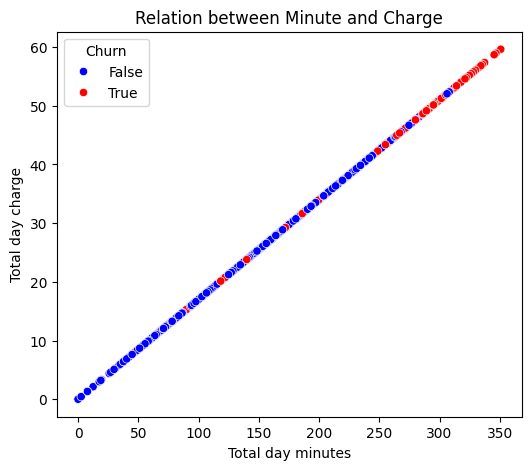

In [ ]:
sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data=dataset, palette=custom_palette)
plt.title('Relation between Minute and Charge')
plt.show()

#### Line Plot

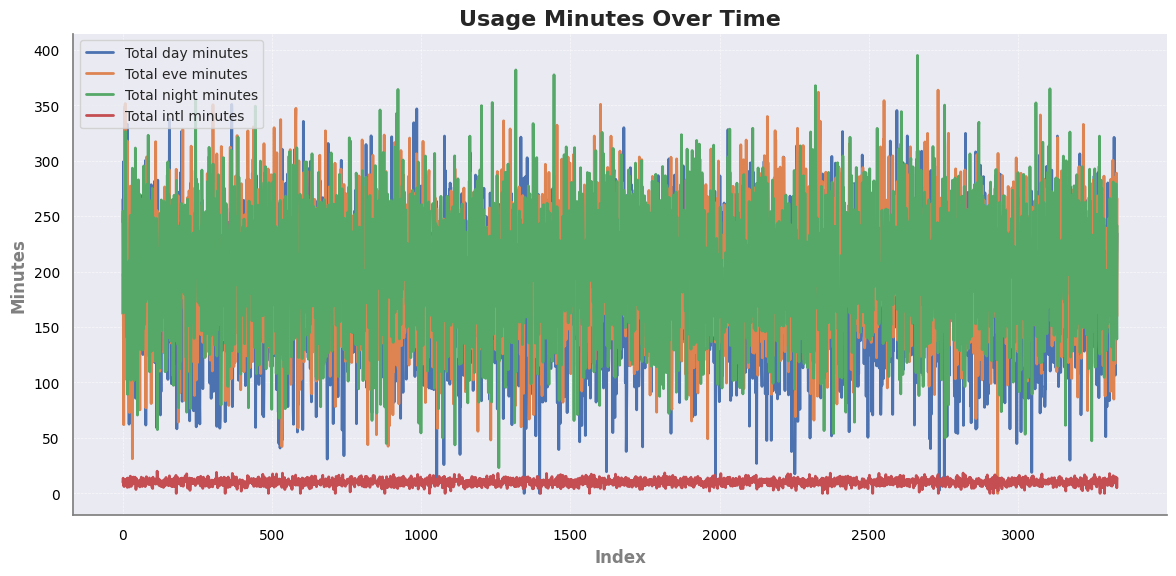

In [ ]:
# Template 1
# Multiple columns Line Plot
# Select columns for the line plot
columns_to_plot = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']

# Plot the data
plt.figure(figsize=(12, 6))
for column in columns_to_plot:
    plt.plot(dataset[column], label=column, linewidth=2)

# Add labels and title
plt.xlabel('Index', fontsize=12, fontweight='bold', color='gray')
plt.ylabel('Minutes', fontsize=12, fontweight='bold', color='gray')
plt.title('Usage Minutes Over Time', fontsize=16, fontweight='bold')

# Add legend with improved styling
plt.legend(fontsize=10, loc='upper left')

# Add grid with customized style
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=10, colors='black')

# Customize spine colors
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['left'].set_color('gray')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
orders.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
orders['OrderDateMonth'] = pd.to_datetime(orders['Order Date'].dt.year.astype('str') + '-' + orders['Order Date'].dt.month.astype('str') + '-01')

In [ ]:
orders_sm = orders.groupby('OrderDateMonth').agg({'Sales':'sum','Profit':'sum','Discount':'mean'}).reset_index()

In [ ]:
orders_sm.columns

Index(['OrderDateMonth', 'Sales', 'Profit', 'Discount'], dtype='object')

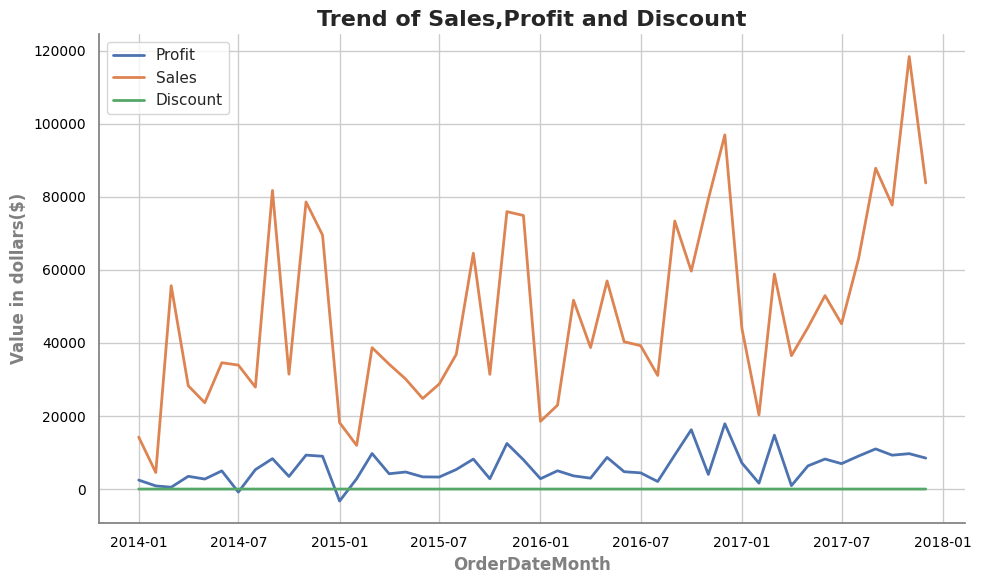

In [ ]:
# Template 2 : Two columns (x&y trend)
# using orders table for date vs columns trend
# Select columns for the line plot
x_column = 'OrderDateMonth'
y_column = ['Profit','Sales','Discount']

# Plot the data
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Set the style to whitegrid for a cleaner look

# Plot the line with smoothened trend
for i in y_column:
  sns.lineplot(data=orders_sm, x=x_column, y=i, linewidth=2, label = i)



# Add labels and title
plt.xlabel(x_column, fontsize=12, fontweight='bold', color='gray')
plt.ylabel('Value in dollars($)', fontsize=12, fontweight='bold', color='gray')
plt.title(f'Trend of Sales,Profit and Discount', fontsize=16, fontweight='bold')

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=10, colors='black')
plt.legend()
# Customize spine colors
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['left'].set_color('gray')

# Show plot
plt.tight_layout()
plt.show()

#### Correlation Plot

In [ ]:
dataset.describe().columns

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

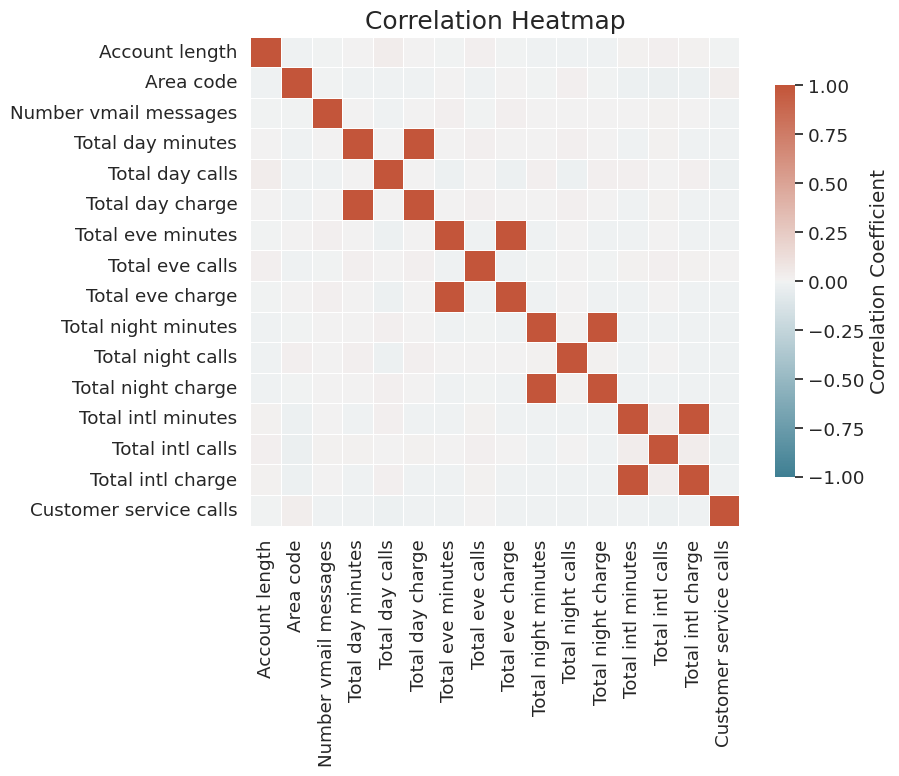

In [ ]:
# Create a beautiful heatmap
corr = dataset[dataset.describe().columns].corr()
# Create a beautiful heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Increase font size for readability

# Define custom color palette with more contrast
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with improved annotation and aesthetics
sns.heatmap(corr, cmap=cmap, annot=False, fmt=".2f", annot_kws={"size": 12, "weight": "bold"},
            linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            square=True, linecolor='white', vmin=-1, vmax=1)

# Add title
plt.title('Correlation Heatmap', fontsize=18)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()